In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.1.


In [3]:
data_df = pd.read_csv("../src/data/give_me_credit/give_me_credit_data.csv")
data_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Debt
0,1,0.766127,45,2,9120.0,13,0,6,0,2.0,7323.197016
1,0,0.957151,40,0,2600.0,4,0,0,0,1.0,316.878123
2,0,0.658180,38,1,3042.0,2,1,0,0,0.0,258.914887
3,0,0.233810,30,0,3300.0,5,0,0,0,0.0,118.963951
4,0,0.907239,49,1,63588.0,7,0,1,0,0.0,1584.975094
...,...,...,...,...,...,...,...,...,...,...,...
120264,0,0.385742,50,0,3400.0,7,0,0,0,0.0,1374.595707
120265,0,0.040674,74,0,2100.0,4,0,1,0,0.0,472.774869
120266,0,0.299745,44,0,5584.0,4,0,1,0,2.0,4001.283436
120267,0,0.000000,30,0,5716.0,4,0,0,0,0.0,0.000000


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = data_df.iloc[:,1:], data_df.iloc[:,0]
# 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/yabutamidori/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9306560239461212

# AUC

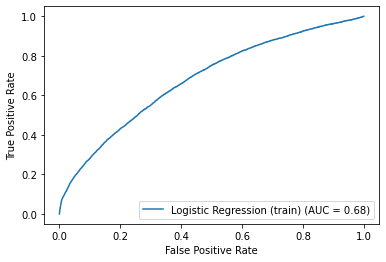

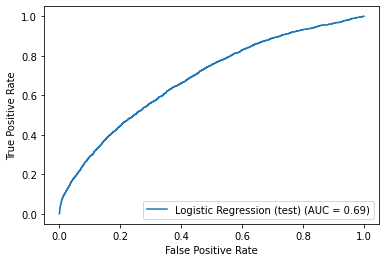

In [5]:
# from sklearn.metrics import RocCurveDisplay

# logistic_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

from sklearn import metrics

metrics.plot_roc_curve(clf, X_train, y_train, name="Logistic Regression (train)") 
metrics.plot_roc_curve(clf, X_test, y_test, name="Logistic Regression (test)") 
plt.show()

# Calibration Curve

Reference: 
- https://scikit-learn.org/0.24/modules/generated/sklearn.calibration.calibration_curve.html#sklearn.calibration.calibration_curve
- https://scikit-learn.org/0.24/auto_examples/calibration/plot_compare_calibration.html#sphx-glr-auto-examples-calibration-plot-compare-calibration-py

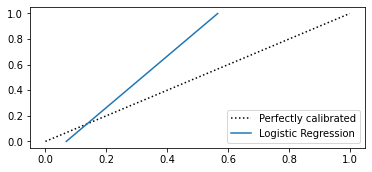

In [15]:
from sklearn.calibration import calibration_curve

num_bins = 5

y_pred = clf.predict(X_test)
prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=num_bins)

ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.plot(prob_true, prob_pred, label="Logistic Regression")
ax1.legend(loc="lower right")

In [51]:
import tensorflow as tf

y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.int64)
y_pred_tensor = tf.convert_to_tensor(y_pred, dtype=tf.int64)

In [52]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
# Computing logit
y_pred_proba = clf.predict_proba(X_test).astype(np.double)
n = len(y_pred_proba)
logit = np.log(y_pred_proba / (np.ones((n,2), dtype=np.double) - y_pred_proba))
logit_tensor = tf.convert_to_tensor(logit, dtype=tf.double)

<ipython-input-65-9a2f640506ff>:4: RuntimeWarning: divide by zero encountered in true_divide
  logit = np.log(y_pred_proba / (np.ones((n,2), dtype=np.double) - y_pred_proba))


In [69]:
y_pred_proba.astype(np.double).dtype

dtype('float64')

In [70]:
tf.cast(logit_tensor, np.double)

<tf.Tensor: shape=(24054, 2), dtype=float64, numpy=
array([[ 1.53792549, -1.53792549],
       [ 2.61615181, -2.61615181],
       [ 2.47042447, -2.47042447],
       ...,
       [ 2.73703101, -2.73703101],
       [ 3.90623973, -3.90623973],
       [ 2.11369661, -2.11369661]])>

In [71]:
import tensorflow_probability as tfp

tfp.stats.expected_calibration_error(
    num_bins, logits=logit_tensor, labels_true=y_test_tensor, labels_predicted=y_pred_tensor, name="logistic_regression"
)

InvalidArgumentError: cannot compute Sub as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:Sub]